# Part 1. Solutions to Python portfolio tasks 

# Task 1:

In [1]:
# Importing the required Libraries to perform the given task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Creating the Data frame using the pandas library to read the given CSV file
MyNewDataFrame = pd.read_csv('Iris.csv')
# Printing the first 10 rows of the dataset
print(MyNewDataFrame.head(10))

   Sepal length  Sepal width  Petal length  Petal width Species
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa
3           4.6          3.1           1.5          0.2  Setosa
4           5.0          3.6           1.4          0.2  Setosa
5           5.4          3.9           1.7          0.4  Setosa
6           4.6          3.4           1.4          0.3  Setosa
7           5.0          3.4           1.5          0.2  Setosa
8           4.4          2.9           1.4          0.2  Setosa
9           4.9          3.1           1.5          0.1  Setosa


In [3]:
# Obtaining the required statistical information for each one of the three species of iris from the dataset
# Finding the no. of rows in a dataframe
rows = len(MyNewDataFrame.axes[0])
# Creating an empty array named Setosa, Versicolor & Virginica for storing the respective petal width values
Setosa = []
Versicolor = []
Virginica = []
# Appending the respective values of petal width in Setosa, Versicolor & Virginica array by using for-loop
for i in range(0, rows):
    if MyNewDataFrame.at[i, 'Species'] == 'Setosa':
        Setosa.append( MyNewDataFrame.at[i, 'Petal width'])
    elif MyNewDataFrame.at[i, 'Species'] == 'Versicolor':
        Versicolor.append( MyNewDataFrame.at[i, 'Petal width'])
    elif MyNewDataFrame.at[i, 'Species'] == 'Virginica':
        Virginica.append( MyNewDataFrame.at[i, 'Petal width'])   

# Calculating the Mean, Median, Standards deviation & range by using Numpy Library for each species of Iris considering only the Petal width
li = [Setosa, Versicolor,Virginica]
li_name = ["Setosa", "Versicolor","Virginica"]
my_dict = {"Setosa":[],"Versicolor":[],"Virginica":[]} # Creating a dictionary to store Mean,Median,Range & SD values
count=0
for item in li:
    Mean = round(np.mean(item), 2)
    my_dict[li_name[count]].append(Mean) # Appending mean value to the dictionary for respective species
    Median = round(np.median(item), 2)
    my_dict[li_name[count]].append(Median) # Appending median value to the dictionary for respective species
    Range = round((np.max(item)-np.min(item)), 2)
    my_dict[li_name[count]].append(Range) # Appending range value to the dictionary for respective species
    StandardDeviation = round(np.std(item), 2)
    my_dict[li_name[count]].append(StandardDeviation) # Appending SD value to the dictionary for respective species
    count= count+1
df=pd.DataFrame(my_dict,index=["Mean","Median","Range","Standard Deviation"]) # Create dataframe from dictionary of lists
df # print the dataframe indicating mean,median,range & SD for the three species of iris

,Setosa,Versicolor,Virginica
Mean,0.24,1.33,2.03
Median,0.20,1.30,2.00
Range,0.50,0.80,1.10
Standard Deviation,0.11,0.20,0.27


# Task 2:

#### Box Plot would provide optimal visualisation for a single attribute of a single species from the Iris dataset.
#### With the help of Box Plot, we can illustrate the summary of a group of data values with features like minimum, first quartile, median, third quartile, and maximum. With a centre line designating the median value, box limitations show the range of the centre 50% of the data. From each box, lines extend to represent the range of the remaining data, and dots are positioned beyond the line's margins to represent outliers if any.

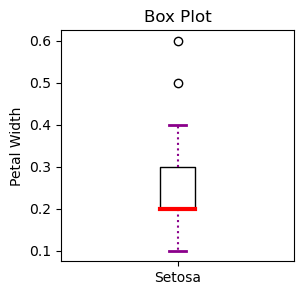

In [4]:
fig = plt.figure(figsize =(3, 3)) # In order to modify the size

ax = fig.add_subplot(111) # Adding multiple Axes objects

# Creating plot (Choosing Setosa species and it's Petal width attribute from the Iris dataset and visualising it's values)
bp = plt.boxplot(Setosa)

# Changing color and linewidth of caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
    
# Changing color and linewidth of whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
    
# Changing color and linewidth of median
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
    
ax.set_xticklabels(['Setosa'])

# y-axis label
ax.set_ylabel('Petal Width')

# Adding title
plt.title("Box Plot")

# show plot
plt.show()

#### The above Box Plot displays minimum, first quartile, median, third quartile, and maximum and the outliers. Also, it can be seen that the first quartile (Q1) (i.e lower quartile) and the second quartile (Q2) (i.e the median) overlaps indicating a large proportion of identical, low values in the dataset. Moreover, it can be seen that the considered dataset has two outliers in it.

# Task 3:

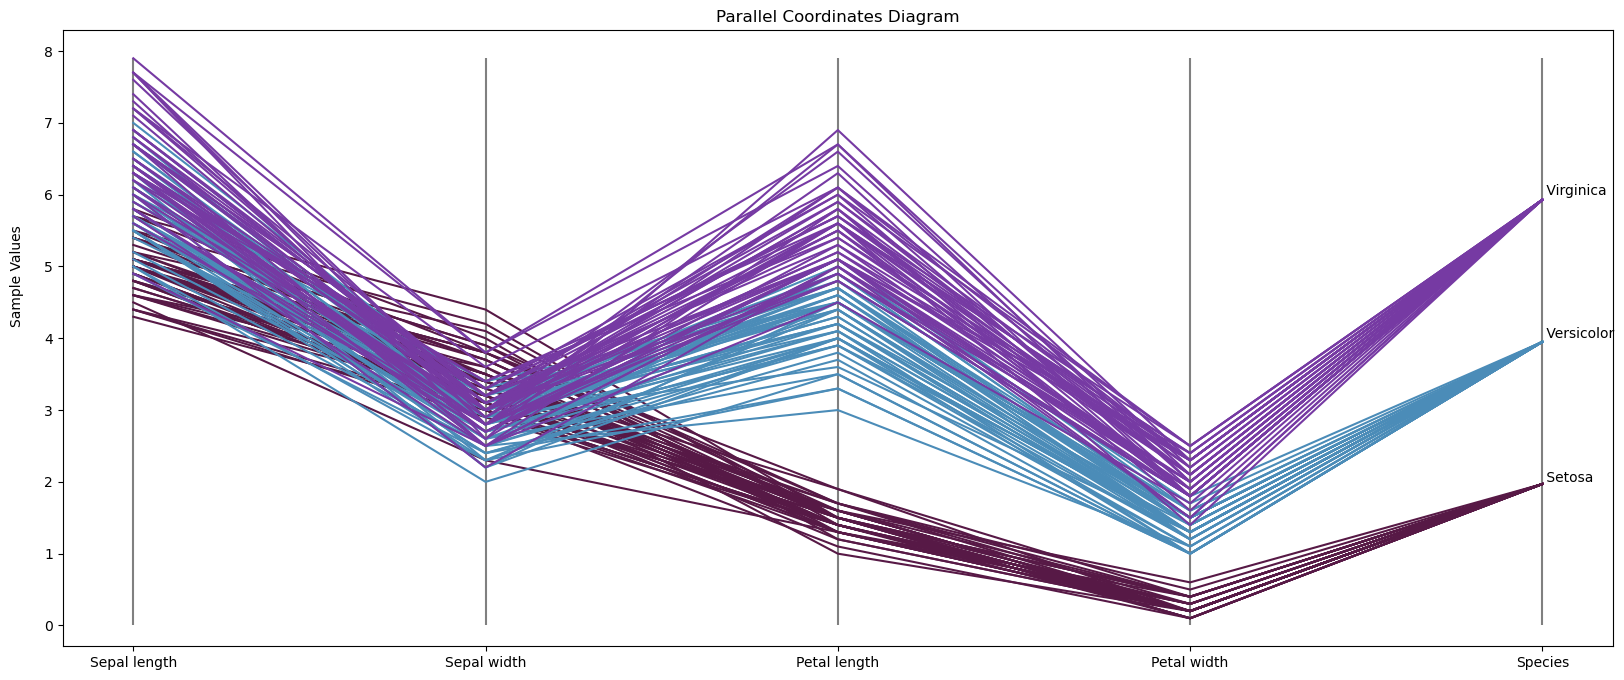

In [5]:
# Creating the Data frame using the pandas library to read the given CSV file
data = pd.read_csv("Iris.csv")

# Creating array from the dataframe
data1 = np.array(data)

# Finding the maximum value in a dataframe
Max = max(data.max(numeric_only=True))

# Finding the no. of rows in a dataframe
rows = len(MyNewDataFrame.axes[0])

# Replacing the string values in Species column with the numeric positions 
for i in range(0,rows):
    if data1[i][4]=='Setosa':
       data1[i][4] = round(Max - (3*(Max/4)), 2)
    if data1[i][4]=='Versicolor':
       data1[i][4] = round(Max - (2*(Max/4)), 2)
    if data1[i][4]=='Virginica':
       data1[i][4] = round(Max - (1*(Max/4)), 2)

# Naming the Spine as per attributes of Iris species  
Name = ['Sepal length','Sepal width','Petal length','Petal width', 'Species']

# Set with hexadecimal digits used for the colours of the lines
k = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']

# In order to modify the size
plt.figure(figsize=(20, 8))

# Plotting the spines (axis) of the parallel coordinates
for i in range(0, 5):
    plt.vlines(i, 0, Max , '#808080')
    
# Defining the function to generate the random hex color    
def color(vr):
    MyC = '#'
    for j in range(0, 6):
        s = np.random.choice(k)
        MyC = MyC + s
    return MyC

# Generating the parallel coordinates diagram
for i in range(0, rows):
    if i==0 or i==50 or i==100:
        cl = color(i)
    MyC = cl
    plt.plot(Name,data1[i],  color=MyC)

# Plotting the Labels
plt.text(4, 2, ' Setosa')
plt.text(4, 4, ' Versicolor')
plt.text(4, 6, ' Virginica')
plt.text(-0.35, 4.2, s='Sample Values', rotation=90)

# Adding title
plt.title("Parallel Coordinates Diagram")

# show plot
plt.show()


#### According to the diagram, the petal Length is the best property for classifying the different species of iris. There is an obvious pattern emerging in the plot. As can be seen from the plot, Setosa species flowers , Versicolor species flowers  and viriginica species have distinct Petal Length which can be used to classify the same. 